# Geometry

## Model types

There are 4 model types classified by the way in which the foundation structure is modeled (plate elements or solid polygons) and the geometry (symmetric and non-symmetric models):

- ``Plate``: Non-symetric plate model.
- ``SPlate``: Symetric plate model.
- ``Solid``: : Non-symetric solid model.
- ``SSolid``: : Symetric solid model.

In a symmetric model only half of the foundation is build in Plaxis, with the other half assumed to be a mirror image. Consequently in symmetric models the column is always centered in the foundation, and only vertical loads can be applied. The following code creates four models in Plaxis. These four models represent the same strip foundation with a centered column with either plates or a solid and in full or only half:

In [1]:
from plxscripting.easy import *
import padtest

# start server
password = "nicFgr^TtsFm~h~M"
localhostport_input = 10000 
localhostport_output = 10001
s_i, g_i = new_server('localhost', localhostport_input, password=password) 
s_o, g_o = new_server('localhost', localhostport_output, password=password)

# Geoemtry
d = 1.2 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 0
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg


# Plate material for a f'c=30MPa concrete slab with a 40cm thickness and 24kN/m3 unit weight
column = padtest.concrete(30, 24, b1)
# Plate material for a f'c=30MPa concrete slab with a 60cm thickness and 24kN/m3 unit weight
footing = padtest.concrete(30, 24, d1)

# elastic material for concrete with equivalent stiffness than the column and footing
concrete = {}
concrete['SoilModel'] = 'elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# Model creation (run one at the time)
model1 = padtest.SPlate(s_i, g_i, g_o, b, d, soil, footing, column, model_type='planestrain')
model2 = padtest.Plate(s_i, g_i, g_o, b, d, soil, footing, column, model_type='planestrain')
model3 = padtest.SSolid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete, model_type='planestrain')
model4 = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete, model_type='planestrain')

The resulting models look like:

<img src="images/models.png" alt="Model types." width="700">

Both symmetric and non-symmetric model can be [plane-strain or axisymmetric in Plaxis](workflow.ipynb#General-model-settings). A symmetric plane-strain model represents a strip foundation with centered column. A symmetric axisymmetric model represents a circular foundation also with a centered column. Non-symmetric plane-strain model represents a strip foundation, with the advantage that [the column does not need to be centered](#Column-offset) in the foundation and that not only vertical, but also [horizontal and moment loads](test.ipynb#Load-test) can be applied to the foundation. A non-symmetric axisymmetric model represents a ring foundation, for example under a tank or silo. As with the plane-strain case, not only vertical, but horizontal and moment loads can be applied, and the column does not need to be centered.

When the column is centered in the foundation and only vertical loads are of interest, the ``SPlate`` and ``SSolid`` are preferable as they required half the number of elements and thus are much faster to run. Although [shake tests](test.ipynb#Shake-test) can be performed in ``SPlate`` and ``SSolid`` models, they do not have a valid physical interpretation as they would imply the soil stretching outwards and contracting from the axis of the foundation. The same happens in ``Plate`` and ``Solid`` models if they are axisymmetric.

## Solid foundations

Solid foundations model the foundation structure as a solid polygon instead of a plate. A soil material must be provided for the foundation material.

In [2]:
# Geometry
d = 3 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 0
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete)

The resulting model is:

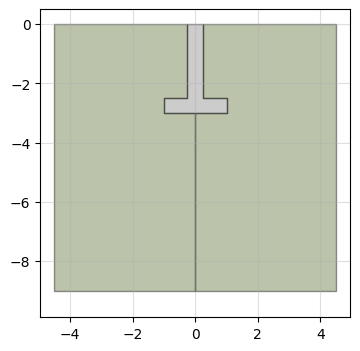

In [3]:
model.plot()

## Column offset

The column offset in ``Plate`` and ``Solid`` models is controlled with the ``b2`` argument that represents the distance from the left edge of the footing to the column axis. In ``Solid`` models the column width ``b1`` is included in the geometry, which limits ``b2`` in  $b_1 /\ 2 \leq b_2 \leq b - b_1 /\ 2$. In ``Plate`` models the axis of the column can be located at the edge of the footing plate, so $0 \leq b_2 \leq b$.

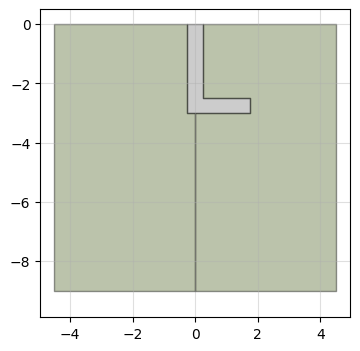

In [4]:
# Geometry
d = 3 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width
b2 = 0.25 # distance from the left edge of the footing to the center of the column

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 0
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete, b2=b2)
model.plot()

The same model with plate structure is created with:

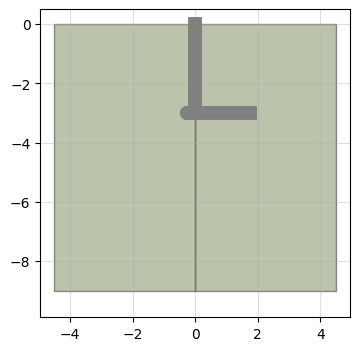

In [5]:
# Plate material for a f'c=30MPa concrete slab with a 40cm thickness and 24kN/m3 unit weight
column = padtest.concrete(30, 24, b1)
# Plate material for a f'c=30MPa concrete slab with a 60cm thickness and 24kN/m3 unit weight
footing = padtest.concrete(30, 24, d1)

# build model
model = padtest.Plate(s_i, g_i, g_o, b, d, soil, footing, column, b2=b2)
model.plot()

## Surface foundations

A surface foundation is created by setting the depth to 0. If the foundation is modeled by plate elements, no material need to be provided for the column:

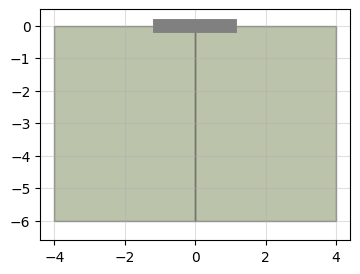

In [6]:
d = 0 # Foundation depth
b = 2 # Foundation width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 0
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# Create with f'c=30MPa concrete slab with a 60cm thickness and 24kN/m3 unit weight
footing = padtest.concrete(30, 24, d1)
column = None

# Create model
model = padtest.Plate(s_i, g_i, g_o, b, d, soil, footing, column)
model.plot()

If the foundation is modeled as a solid, the column width is still required as the width of the applied uniform load on top of the foundation.

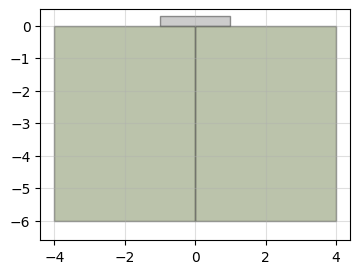

In [7]:
# Geometry
d = 0 # Foundation depth
b = 2 # Foundation width
b1 = 0.6 # Load width
d1 = 0.3 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 0
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete)
model.plot()

Solid foundations can be partially embedded:

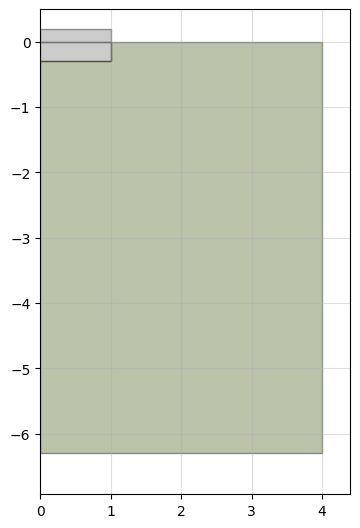

In [8]:
# Geometry
d = 0.3 # Foundation depth
b = 2 # Foundation width
b1 = 0.6 # Load width
d1 = 0.5 # Foundation width

# build model
model = padtest.SSolid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete)
model.plot()

## Stratification

Multiple soil layers are defined by providing a soil material for each layer and specify each layer thickness with the `dstrata` parameter. If the model height exceeds the combined height of the individual layers, the bottom layer is extended.

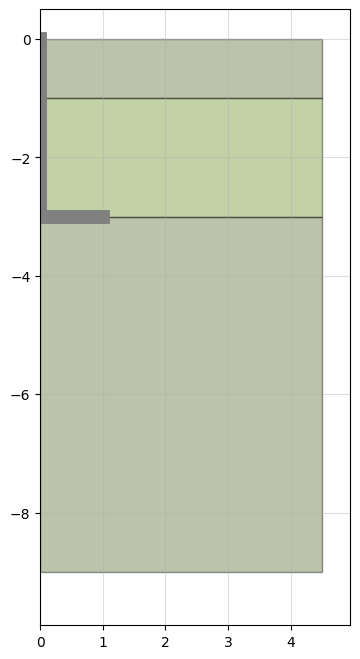

In [9]:
d = 3 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb top soil material
top_layer = {}
top_layer['SoilModel'] = 'mohr-coulomb'
top_layer["DrainageType"] = 0
top_layer['gammaSat'] = 20 # kN/m3
top_layer['gammaUnsat'] = 17 # kN/m3
top_layer['e0'] = 0.2
top_layer['Eref'] = 4e4 # kN
top_layer['nu'] = 0.2
top_layer['cref'] = 0 # kPa
top_layer['phi'] = 30 # deg
top_layer['psi'] = 0 # deg

# Mohr-Coulomb second soil material
mid_layer = {}
mid_layer['SoilModel'] = 'mohr-coulomb'
mid_layer["DrainageType"] = 0
mid_layer['gammaSat'] = 20 # kN/m3
mid_layer['gammaUnsat'] = 17 # kN/m3
mid_layer['e0'] = 0.2
mid_layer['Eref'] = 4e4 # kN
mid_layer['nu'] = 0.2
mid_layer['cref'] = 0 # kPa
mid_layer['phi'] = 32 # deg
mid_layer['psi'] = 0 # deg

# Mohr-Coulomb second soil material
bottom_layer = {}
bottom_layer['SoilModel'] = 'mohr-coulomb'
bottom_layer["DrainageType"] = 0
bottom_layer['gammaSat'] = 20 # kN/m3
bottom_layer['gammaUnsat'] = 17 # kN/m3
bottom_layer['e0'] = 0.2
bottom_layer['Eref'] = 4e4 # kN
bottom_layer['nu'] = 0.2
bottom_layer['cref'] = 0 # kPa
bottom_layer['phi'] = 39 # deg
bottom_layer['psi'] = 0 # deg

# Plate material for a f'c=30MPa concrete slab with a 40cm thickness and 24kN/m3 unit weight
column = padtest.concrete(30, 24, b1)
# Plate material for a f'c=30MPa concrete slab with a 60cm thickness and 24kN/m3 unit weight
footing = padtest.concrete(30, 24, d1)

# build model
model = padtest.SPlate(s_i, g_i, g_o, b, d,
                       [top_layer, mid_layer, bottom_layer], footing, column,
                       dstrata=[1, 2, 3])
model.plot()

## Fill

The fill material used in buried foundations is included in the model by provided a soil material in the `fill` argument and the excavation slope (in degrees) in the `fill_angle` argument. The model includes the initial phase with only the original stratigraphy, an excavation phase where the soil material is removed, and a construction phase where the foundation and the fill are activated.

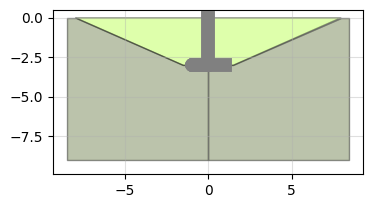

In [10]:
d = 3 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb top soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 0
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 30 # deg
soil['psi'] = 0 # deg

# Mohr-Coulomb second soil material
fill = {}
fill['SoilModel'] = 'mohr-coulomb'
fill["DrainageType"] = 0
fill['gammaSat'] = 20 # kN/m3
fill['gammaUnsat'] = 17 # kN/m3
fill['e0'] = 0.2
fill['Eref'] = 4e4 # kN
fill['nu'] = 0.2
fill['cref'] = 0 # kPa
fill['phi'] = 32 # deg
fill['psi'] = 0 # deg


# Plate material for a f'c=30MPa concrete slab with a 40cm thickness and 24kN/m3 unit weight
column = padtest.concrete(30, 24, b1)
# Plate material for a f'c=30MPa concrete slab with a 60cm thickness and 24kN/m3 unit weight
footing = padtest.concrete(30, 24, d1)

# build model
model = padtest.Plate(s_i, g_i, g_o, b, d, soil, column, footing, fill=fill, fill_angle=25)

model.plot()

The `nfill` parameter generates multiple fill layers of equal thickness. A list of soil materials for each layer must be provided, from top to bottom. 

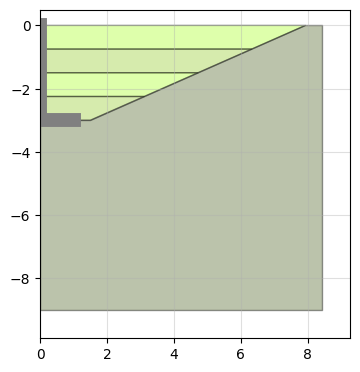

In [11]:
model = padtest.SPlate(s_i, g_i, g_o, b, d, soil, footing, column,
                       nfill=4, fill=[fill,fill,fill,fill],
                       fill_angle=25)
model.plot()

The `dfill` parameter generates fill layers of the requested thickness. If the cumulative thickness of the fill layers is below the foundation depth, and additional layer is added.

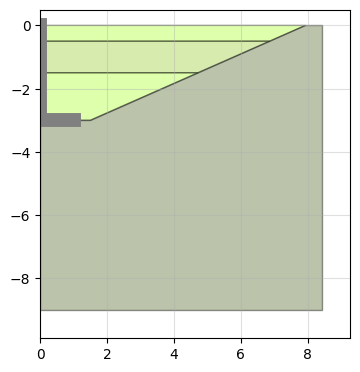

In [12]:
model = padtest.SPlate(s_i, g_i, g_o, b, d, soil, footing, column,
                       dfill=[0.5, 1], fill=[fill,fill,fill], fill_angle=25)
model.plot()

The `bfill` parameter controls the distance between the edge of the foundation and the start of the fill slope.

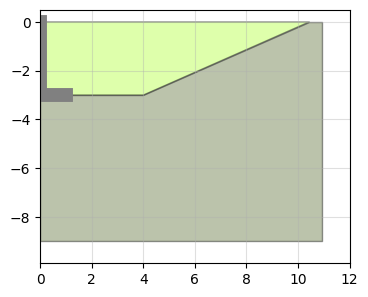

In [13]:
model = padtest.SPlate(s_i, g_i, g_o, b, d, soil, footing, column,
                       fill=[fill], fill_angle=25, bfill=3)
model.plot()

## Water table

The `wt` parameter specifies the global water table of the model, which is applied to all stages.

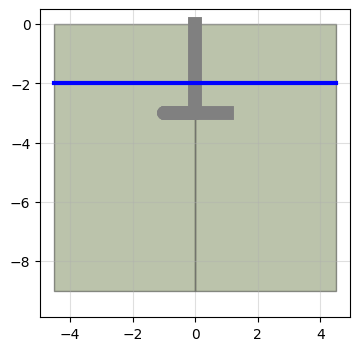

In [14]:
d = 3 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 0
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# Plate material for a f'c=30MPa concrete slab with a 40cm thickness and 24kN/m3 unit weight
column = padtest.concrete(30, 24, b1)
# Plate material for a f'c=30MPa concrete slab with a 60cm thickness and 24kN/m3 unit weight
footing = padtest.concrete(30, 24, d1)

# initialize model
model = padtest.Plate(s_i, g_i, g_o, b, d, soil, footing, column, wt=2)

# plot
model.plot()

## Output locations

When a [test](test.ipynb) is conducted, displacements are retrieved at several points in the foundation. These locations include the top of the column (or the top of the slab in a surface foundation) and several points in the bottom of the footing. The location of these points in the model is defined with the `location` parameter. Values between -1 and 1 are admitted, with -1 representing the left edge of the foundation, 0 the column axis and 1 the right edge. The default output locations at the bottom of the foundation are `[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]`.

The position of the output locations can be seen in the foundation plot:

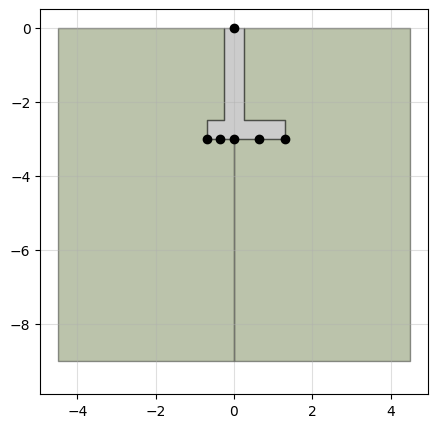

In [15]:
# Geometry
d = 3 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width
b2 = 0.7 # column location

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 0
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
self = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete, build=False,
                     b2=b2, locations=[-1, -0.5, 0, 0.5, 1])

self.plot(output_location=True, figsize=5)

## Interfaces

Interfaces can be included between the footing and the soil by setting the ``interface`` parameter to ``True``. The interface strength is controlled by the ``'Rinter'`` parameter of the adjacent soil or by assigning them a [soil material](materials.ipynb#Soil-materials). Interfaces can be shown in the model plot by setting the ``interface`` parameter to ``True``. The interfaces are shown as red lines in the foundation perimeter.

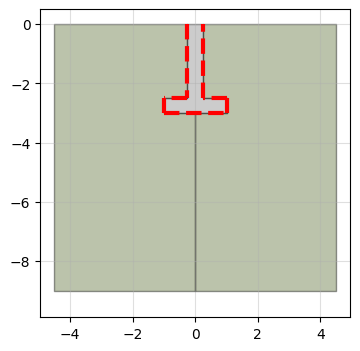

In [16]:
d = 3 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 0
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg
soil['Rinter'] = 0.5 # interface strength

# Plate material for a f'c=30MPa concrete slab with a 40cm thickness and 24kN/m3 unit weight
# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete,
                      interface=True)

# plot
model.plot(interface=True)

Individual interfaces can be activated or deactivated using a dictionary with keys ``'column'``, ``'top'``, ``'latera'`` and ``'bottom'``.

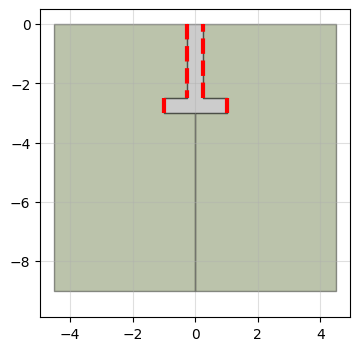

In [17]:
# build model
model = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete,
                      interface={'column':True, 'top':False, 'lateral':True, 'bottom':False})

# plot
model.plot(interface=True)

[Soil materials](materials.ipynb#Soil-materials) can be assigned to each interface:

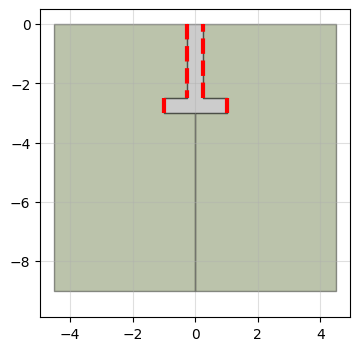

In [18]:
# Mohr-Coulomb material for the interface
interface = {}
interface['SoilModel'] = 'mohr-coulomb'
interface["DrainageType"] = 0
interface['gammaSat'] = 20 # kN/m3
interface['gammaUnsat'] = 17 # kN/m3
interface['e0'] = 0.2
interface['Eref'] = 4e4 # kN
interface['nu'] = 0.2
interface['cref'] = 0 # kPa
interface['phi'] = 35 # deg
interface['psi'] = 0 # deg

# build model
model = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete,
                      interface={'column':interface, 'top':False,
                                 'lateral':interface, 'bottom':False})

# plot
model.plot(interface=True)

## Model size

The `model_width` and  `model_depth` parameters control the extent of the model.

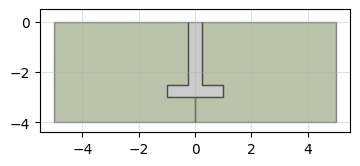

In [19]:
d = 3 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 0
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# Plate material for a f'c=30MPa concrete slab with a 40cm thickness and 24kN/m3 unit weight
# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete,
                      model_width=10, model_depth=4)

# plot
model.plot()